In [4]:
# %pip install chardet

# import chardet
# file_path = "Apple-Twitter-Sentiment-DFE.csv"

# # Detect the encoding of the file
# with open(file_path, 'rb') as file:
#     result = chardet.detect(file.read())
#     encoding = result['encoding']
#     print(f"Detected encoding: {encoding}")


In [1]:
import pandas as pd
import re
import string
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

## Data Collection

In [6]:
# # Collect historical stock price data for Apple (AAPL)
# import yfinance as yf
# stocks_df = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
# stocks_df.to_csv("../csv/stocks.csv")


In [2]:
# Collect historical stock price data for Apple (AAPL)
# stocks_df = yf.download('AAPL', start='2020-01-01', end='2023-01-01')

# Read stocks.csv
stocks_df = pd.read_csv("../csv/stocks.csv")

# Shape / Dimensions of data
stocks_df.shape

(756, 7)

In [3]:
# Collect tweets for the stocks

# Read Apple-Twitter-Sentiment-DFE.csv.csv
stock_tweets_df = pd.read_csv("../csv/Apple-Twitter-Sentiment-DFE.csv", encoding="ISO-8859-1")

# Shape / Dimensions of data
stock_tweets_df.shape

(3886, 12)

In [4]:
# Display the first few rows of the dataframe
display(stocks_df.head())

# Display summary statistics
display(stocks_df.describe())

# Display information about the dataframe
display(stocks_df.info())

# Check for missing values
display(stocks_df.isnull().sum())


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960449,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251137,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826859,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484344,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650352,132079200


,Open,High,Low,Close,Adj Close,Volume
count,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02
mean,130.231998,131.892775,128.614983,130.311812,128.230002,1.120920e+08
std,30.596429,30.841435,30.287325,30.566496,30.563734,5.602586e+07
min,57.020000,57.125000,53.152500,56.092499,54.632900,3.519590e+07
25%,115.924374,117.275000,114.129997,115.739374,113.236624,7.636470e+07
50%,135.794998,137.200005,133.750000,135.379997,133.632797,9.493580e+07
75%,150.259998,151.902504,149.029995,150.704998,148.914688,1.296327e+08
max,182.630005,182.940002,179.119995,182.009995,179.481125,4.265100e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       756 non-null    object 
 1   Open       756 non-null    float64
 2   High       756 non-null    float64
 3   Low        756 non-null    float64
 4   Close      756 non-null    float64
 5   Adj Close  756 non-null    float64
 6   Volume     756 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 41.5+ KB


None

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
# Display the first few rows of the dataframe
display(stock_tweets_df.head(3))

# Display summary statistics
display(stock_tweets_df.describe())

# Display information about the dataframe
display(stock_tweets_df.info())

# Check for missing values
display(stock_tweets_df.isnull().sum())


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...


,_unit_id,_trusted_judgments,sentiment:confidence,id
count,3.886000e+03,3886.000000,3886.000000,3.886000e+03
mean,6.234975e+08,3.687082,0.829526,5.410039e+17
std,1.171906e+03,2.004595,0.175864,7.942752e+14
min,6.234955e+08,3.000000,0.332700,5.400000e+17
25%,6.234965e+08,3.000000,0.674475,5.400000e+17
50%,6.234975e+08,3.000000,0.811250,5.410000e+17
75%,6.234984e+08,3.000000,1.000000,5.420000e+17
max,6.235173e+08,27.000000,1.000000,5.420000e+17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _unit_id              3886 non-null   int64  
 1   _golden               3886 non-null   bool   
 2   _unit_state           3886 non-null   object 
 3   _trusted_judgments    3886 non-null   int64  
 4   _last_judgment_at     3783 non-null   object 
 5   sentiment             3886 non-null   object 
 6   sentiment:confidence  3886 non-null   float64
 7   date                  3886 non-null   object 
 8   id                    3886 non-null   float64
 9   query                 3886 non-null   object 
 10  sentiment_gold        103 non-null    object 
 11  text                  3886 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 337.9+ KB


None

_unit_id                   0
_golden                    0
_unit_state                0
_trusted_judgments         0
_last_judgment_at        103
sentiment                  0
sentiment:confidence       0
date                       0
id                         0
query                      0
sentiment_gold          3783
text                       0
dtype: int64

## Data Preprocessing

In [6]:
# Convert the 'date' column to datetime format
stock_tweets_df['date'] = pd.to_datetime(stock_tweets_df['date'], format='%a %b %d %H:%M:%S %z %Y', errors="coerce")
# errors="coerce" will replace any date that cannot be converted with NaT (Not a Time)

# Create a new range of dates within the desired range
new_dates = pd.date_range(start='2020-01-01', end='2023-01-01', periods=len(stock_tweets_df))

# Map the existing dates to the new range
stock_tweets_df['date'] = new_dates

# Convert the dates to the desired format
stock_tweets_df['date'] = stock_tweets_df['date'].dt.strftime('%Y-%m-%d')
# .dt access datetime properties of the Series
# .strftime() converts datetime objects to string format

# Select the text and date columns, and make a copy
tweets_df = stock_tweets_df[['text', 'date']].copy()

tweets_df.rename(columns={'text': 'Tweet'}, inplace=True) # Rename the column to Tweet
tweets_df.rename(columns={'date': 'Date'}, inplace=True)  # Rename the column to Date
display(tweets_df)

,Tweet,Date
0,#AAPL:The 10 best Steve Jobs emails ever...htt...,2020-01-01
1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,2020-01-01
2,My cat only chews @apple cords. Such an #Apple...,2020-01-01
3,I agree with @jimcramer that the #IndividualIn...,2020-01-01
4,Nobody expects the Spanish Inquisition #AAPL,2020-01-02
...,...,...
3881,(Via FC) Apple Is Warming Up To Social Media -...,2022-12-30
3882,RT @MMLXIV: there is no avocado emoji may I as...,2022-12-31
3883,@marcbulandr I could not agree more. Between @...,2022-12-31
3884,My iPhone 5's photos are no longer downloading...,2022-12-31


In [12]:
%pip install textblob

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [7]:
# Function to clean tweets
def clean_tweet(tweet):
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)  # Remove mentions
    tweet = re.sub(r'#', '', tweet)  # Remove hashtags
    tweet = re.sub(r'RT[\s]+', '', tweet)  # Remove RT
    tweet = re.sub(r'[\s]+https?://\S+', '', tweet)  # Remove URLs
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    tweet = re_punc.sub('', tweet)  # Remove punctuations
    return tweet

# Clean tweets
tweets_df['Tweet'] = tweets_df['Tweet'].apply(clean_tweet)

display(tweets_df)

,Tweet,Date
0,AAPLThe 10 best Steve Jobs emails everhttptco8...,2020-01-01
1,Why AAPL Stock Had a MiniFlash Crash Today AA...,2020-01-01
2,My cat only chews cords Such an AppleSnob,2020-01-01
3,I agree with that the IndividualInvestor shou...,2020-01-01
4,Nobody expects the Spanish Inquisition AAPL,2020-01-02
...,...,...
3881,Via FC Apple Is Warming Up To Social Media Ap...,2022-12-30
3882,there is no avocado emoji may I ask why,2022-12-31
3883,I could not agree more Between and only gr...,2022-12-31
3884,My iPhone 5s photos are no longer downloading ...,2022-12-31


In [8]:
# %pip install vaderSentiment
# Valence Aware Dictionary and Sentiment Reasoner - VADER

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment(tweet):
    sentiment_dict = analyzer.polarity_scores(tweet)
    return sentiment_dict['compound']  # compound score is a normalized score between -1 and 1

# Get sentiment scores
tweets_df['Sentiment_Vader'] = tweets_df['Tweet'].apply(get_sentiment)

display(tweets_df)

,Tweet,Date,Sentiment_Vader
0,AAPLThe 10 best Steve Jobs emails everhttptco8...,2020-01-01,0.6369
1,Why AAPL Stock Had a MiniFlash Crash Today AA...,2020-01-01,-0.4019
2,My cat only chews cords Such an AppleSnob,2020-01-01,0.0000
3,I agree with that the IndividualInvestor shou...,2020-01-01,0.6597
4,Nobody expects the Spanish Inquisition AAPL,2020-01-02,-0.2960
...,...,...,...
3881,Via FC Apple Is Warming Up To Social Media Ap...,2022-12-30,0.1531
3882,there is no avocado emoji may I ask why,2022-12-31,-0.2960
3883,I could not agree more Between and only gr...,2022-12-31,0.4570
3884,My iPhone 5s photos are no longer downloading ...,2022-12-31,0.1280


In [9]:
# Function to get the sentiment of a tweet
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity

# Get sentiment scores
tweets_df['Sentiment_Blob'] = tweets_df['Tweet'].apply(get_sentiment)

display(tweets_df)

,Tweet,Date,Sentiment_Vader,Sentiment_Blob
0,AAPLThe 10 best Steve Jobs emails everhttptco8...,2020-01-01,0.6369,1.000000
1,Why AAPL Stock Had a MiniFlash Crash Today AA...,2020-01-01,-0.4019,0.000000
2,My cat only chews cords Such an AppleSnob,2020-01-01,0.0000,0.000000
3,I agree with that the IndividualInvestor shou...,2020-01-01,0.6597,0.650000
4,Nobody expects the Spanish Inquisition AAPL,2020-01-02,-0.2960,0.000000
...,...,...,...,...
3881,Via FC Apple Is Warming Up To Social Media Ap...,2022-12-30,0.1531,0.022222
3882,there is no avocado emoji may I ask why,2022-12-31,-0.2960,0.000000
3883,I could not agree more Between and only gr...,2022-12-31,0.4570,0.433333
3884,My iPhone 5s photos are no longer downloading ...,2022-12-31,0.1280,0.000000


In [10]:
tweets_df.to_csv("../csv/tweets.csv", index=False)

In [11]:
# Copying date, sentiment_vader columns to sentiment_df dataframe
sentiment_df = tweets_df[['Date', "Sentiment_Vader"]].copy()

# Renaming Sentiment column name
sentiment_df.rename(columns={'Sentiment_Vader': 'Sentiment'}, inplace=True)
# inplace parameter modifies the original DataFrame directly without creating a new DataFrame

display(sentiment_df)

,Date,Sentiment
0,2020-01-01,0.6369
1,2020-01-01,-0.4019
2,2020-01-01,0.0000
3,2020-01-01,0.6597
4,2020-01-02,-0.2960
...,...,...
3881,2022-12-30,0.1531
3882,2022-12-31,-0.2960
3883,2022-12-31,0.4570
3884,2022-12-31,0.1280


In [12]:
# Group by date and calculate the average sentiment of each date
Avg_Sentiments = sentiment_df.groupby('Date')['Sentiment'].mean().reset_index()

# Renaming column name
Avg_Sentiments.rename(columns={'Sentiment': 'Avg_Sentiment'}, inplace=True)

display(Avg_Sentiments)


,Date,Avg_Sentiment
0,2020-01-01,0.223675
1,2020-01-02,0.064525
2,2020-01-03,-0.426267
3,2020-01-04,0.229125
4,2020-01-05,-0.077833
...,...,...
1092,2022-12-28,0.153100
1093,2022-12-29,0.102067
1094,2022-12-30,0.486825
1095,2022-12-31,0.096333


In [13]:
# Ensure the 'Date' column in the data frame is of datetime type
display(Avg_Sentiments.dtypes)

Avg_Sentiments['Date'] = pd.to_datetime(Avg_Sentiments['Date'])

display(Avg_Sentiments.dtypes)

Date              object
Avg_Sentiment    float64
dtype: object

Date             datetime64[ns]
Avg_Sentiment           float64
dtype: object

In [14]:
sentiment_df = Avg_Sentiments
sentiment_df

,Date,Avg_Sentiment
0,2020-01-01,0.223675
1,2020-01-02,0.064525
2,2020-01-03,-0.426267
3,2020-01-04,0.229125
4,2020-01-05,-0.077833
...,...,...
1092,2022-12-28,0.153100
1093,2022-12-29,0.102067
1094,2022-12-30,0.486825
1095,2022-12-31,0.096333


In [15]:
display(stocks_df.dtypes)

stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])

display(stocks_df.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [16]:
display(stocks_df.shape)
display(sentiment_df.shape)

(756, 7)

(1097, 2)

In [17]:
# Merge sentiment scores with stock price data

# Merging stocks_df, and sentiment_df on Date colum
df = pd.merge(stocks_df, sentiment_df, on='Date', how='inner')
# how='inner' paramenter specifie that only include rows where there is a matching date in both DataFrames.

# Renaming the column name
df.rename(columns={'Avg_Sentiment': 'Sentiment'}, inplace=True)

display(df)

,Date,Open,High,Low,Close,Adj Close,Volume,Sentiment
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960449,135480400,0.064525
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251137,146322800,-0.426267
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826859,118387200,-0.040925
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484344,108872000,-0.006867
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650352,132079200,0.221975
...,...,...,...,...,...,...,...,...
751,2022-12-23,130.919998,132.419998,129.639999,131.860001,130.782562,63814900,0.000000
752,2022-12-27,131.380005,131.410004,128.720001,130.029999,128.967514,69007800,0.153100
753,2022-12-28,129.669998,131.029999,125.870003,126.040001,125.010117,85438400,0.153100
754,2022-12-29,127.989998,130.479996,127.730003,129.610001,128.550949,75703700,0.102067


## Feature Engineering

In [18]:
# Drop rows with NaN values if any
df.dropna(inplace=True)
display(df)

,Date,Open,High,Low,Close,Adj Close,Volume,Sentiment
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960449,135480400,0.064525
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251137,146322800,-0.426267
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826859,118387200,-0.040925
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484344,108872000,-0.006867
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650352,132079200,0.221975
...,...,...,...,...,...,...,...,...
751,2022-12-23,130.919998,132.419998,129.639999,131.860001,130.782562,63814900,0.000000
752,2022-12-27,131.380005,131.410004,128.720001,130.029999,128.967514,69007800,0.153100
753,2022-12-28,129.669998,131.029999,125.870003,126.040001,125.010117,85438400,0.153100
754,2022-12-29,127.989998,130.479996,127.730003,129.610001,128.550949,75703700,0.102067


In [19]:
df.to_csv("../csv/stocks_with_sentiments.csv", index=False)

In [20]:
df = pd.read_csv("../csv/stocks_with_sentiments.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume,Sentiment
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960449,135480400,0.064525
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251137,146322800,-0.426267
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826859,118387200,-0.040925
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484344,108872000,-0.006867
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650352,132079200,0.221975
...,...,...,...,...,...,...,...,...
751,2022-12-23,130.919998,132.419998,129.639999,131.860001,130.782562,63814900,0.000000
752,2022-12-27,131.380005,131.410004,128.720001,130.029999,128.967514,69007800,0.153100
753,2022-12-28,129.669998,131.029999,125.870003,126.040001,125.010117,85438400,0.153100
754,2022-12-29,127.989998,130.479996,127.730003,129.610001,128.550949,75703700,0.102067


In [21]:
# Define features and target
X = df[['High', 'Low', 'Adj Close', 'Volume', 'Sentiment']]
y = df[['Open', 'Close']]

display(X)
display(y)

,High,Low,Adj Close,Volume,Sentiment
0,75.150002,73.797501,72.960449,135480400,0.064525
1,75.144997,74.125000,72.251137,146322800,-0.426267
2,74.989998,73.187500,72.826859,118387200,-0.040925
3,75.224998,74.370003,72.484344,108872000,-0.006867
4,76.110001,74.290001,73.650352,132079200,0.221975
...,...,...,...,...,...
751,132.419998,129.639999,130.782562,63814900,0.000000
752,131.410004,128.720001,128.967514,69007800,0.153100
753,131.029999,125.870003,125.010117,85438400,0.153100
754,130.479996,127.730003,128.550949,75703700,0.102067


,Open,Close
0,74.059998,75.087502
1,74.287498,74.357498
2,73.447502,74.949997
3,74.959999,74.597504
4,74.290001,75.797501
...,...,...
751,130.919998,131.860001
752,131.380005,130.029999
753,129.669998,126.040001
754,127.989998,129.610001


## Model Building

### Linear Regression - Modeling

Normal equation to find parameters
$ x = (A^T A)^{-1} A^T b $

Equation of Linear regression  model
$ y = mx + c $

<!-- Gradient Descent to find best parameters
$ w = w - \alpha * \frac{\partial}{\partial w} J(w) $ -->





In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [23]:
# Make predictions on test data
y_pred = model.predict(X_test)

## Model Evaluation

MAE = $\frac{1}{n} \Sigma_{i=1}^n({y_{pred,i}}-{y_{test,i}})$

MSE = $\frac{1}{n} \Sigma_{i=1}^n({y_{pred,i}}-{y_{test,i}})^2$

In [24]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 0.4925319699793849
Mean Squared Error: 0.5492629718966493


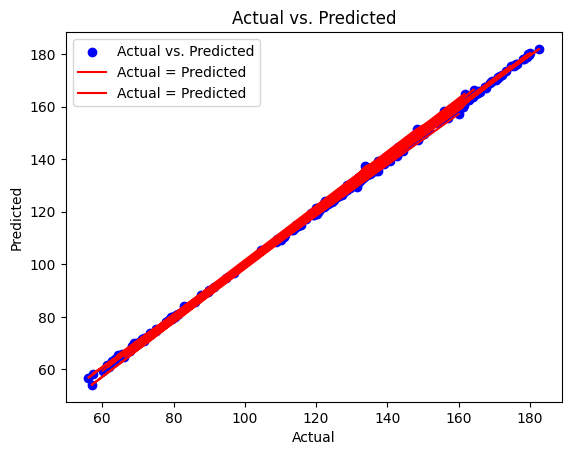

In [25]:
import matplotlib.pyplot as plt

# Scatter plot with different markers/colors
plt.scatter(y_test, y_pred, marker='o', color='b', label='Actual vs. Predicted')
plt.plot(y_test, y_pred, color='r', label='Actual = Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()


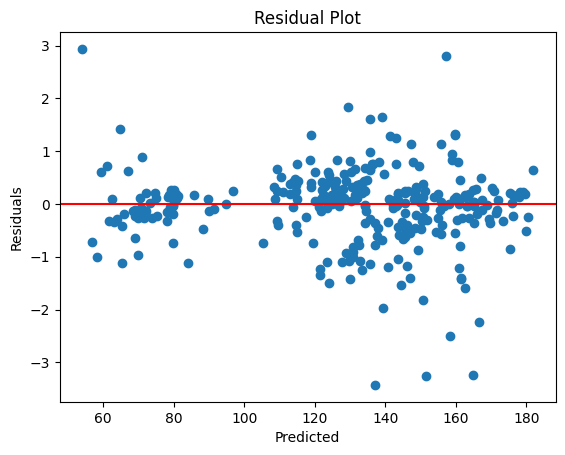

In [26]:
# Residual Plot

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.show()


In [27]:
display(X_test)
display(y_test)

,High,Low,Adj Close,Volume,Sentiment
408,151.190002,146.470001,148.803116,103296000,0.434067
97,80.222504,78.967499,77.360115,102688800,-0.062200
424,157.039993,153.979996,152.731949,74420200,0.152650
584,159.789993,155.380005,154.591293,88063200,-0.596000
603,141.970001,137.330002,138.789764,104132700,0.068467
...,...,...,...,...,...
213,115.589996,112.349998,112.464310,138235500,-0.175575
650,162.410004,159.630005,158.219955,59907000,-0.433133
260,131.449997,128.490005,128.280563,88636800,-0.090300
90,79.922501,77.727501,76.031929,162301200,0.014175


,Open,Close
408,148.539993,151.119995
97,79.665001,79.212502
424,156.979996,155.110001
584,155.910004,156.570007
603,140.809998,140.360001
...,...,...
213,114.139999,114.949997
650,160.100006,160.009995
260,128.759995,130.889999
90,79.457497,77.852501


## Model Deployment

In [30]:
import joblib

# Save the model
joblib.dump(model, '../pkl/stock_price_sentiment_predictor.pkl')

# Load the model
model = joblib.load('../pkl/stock_price_sentiment_predictor.pkl')


In [31]:
# Feature names used during model training
feature_names = ['High', 'Low', 'Adj Close', 'Volume', 'Sentiment']

# New data for prediction
high, low, adj_close, volume, avg_sentiment = 151.190002, 146.470001, 149.004974, 103296000, 0.434067
new_data = pd.DataFrame([[high, low, adj_close, volume, avg_sentiment]], columns=feature_names)

display(new_data)

# Predict for a new day
predicted_close = model.predict(new_data)
print(f'Predicted Open Price: {predicted_close[0][0]}')
print(f'Predicted Close Price: {predicted_close[0][1]}')

,High,Low,Adj Close,Volume,Sentiment
0,151.190002,146.470001,149.004974,103296000,0.434067


Predicted Open Price: 147.63258313527737
Predicted Close Price: 150.93389879859672
